# Task 1

Import packages

In [ ]:
!pip install PyPDF2

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import PyPDF2
import re
from collections import Counter
import os

Upload resume file

In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving Rice Davis Resume.pdf to Rice Davis Resume (1).pdf


Read resume PDF as a list of words

In [ ]:
filename = "Rice Davis Resume.pdf"

# Read PDF text
text = ""
with open(filename, "rb") as f:
    reader = PyPDF2.PdfReader(f)
    for page in reader.pages:
        text += page.extract_text()


resume_words = re.findall(r'\b\w+\b', text.lower())
#print(resume_words)

['rice', 'davis', 'trd7', 'email', 'sc', 'edu', '203', '520', '5755', 'redding', 'ct', 'education', 'university', 'of', 'south', 'carolina', 'molinaroli', 'college', 'of', 'engineering', 'and', 'computing', 'columbia', 'sc', 'candidate', 'for', 'bachelor', 'of', 'science', 'in', 'computer', 'engineering', 'expected', 'may', '2026', 'major', 'computer', 'engineering', 'minor', 'business', 'administration', 'concentration', 'data', 'science', 'gpa', '3', '95', '4', '0', 'achieved', 'dean', 's', 'list', '5', 'consecutive', 'semesters', 'presidents', 'list', '4', '6', 'semesters', 'activities', 'tau', 'beta', 'pi', 'professional', 'engineering', 'fraternity', 'member', 'of', 'pi', 'kappa', 'phi', 'fraternity', 'intramural', 'soccer', 'technical', 'skills', 'languages', 'python', 'r', 'sql', 'c', 'tech', 'stack', 'git', 'databricks', 'jupyter', 'notebook', 'anaconda', 'pycharm', 'spotfire', 'tableau', 'ms', 'office', 'professional', 'experience', 'asml', 'wilton', 'ct', 'business', 'enginee

## a. Histogram of top 20 resume_words

In [ ]:
# Count word frequencies
resume_word_counter = Counter(resume_words)

# Get the 20 most common words and their counts
top_20_resume_words = resume_word_counter.most_common(20)
top_20_words, top_20_counts = zip(*top_20_resume_words)

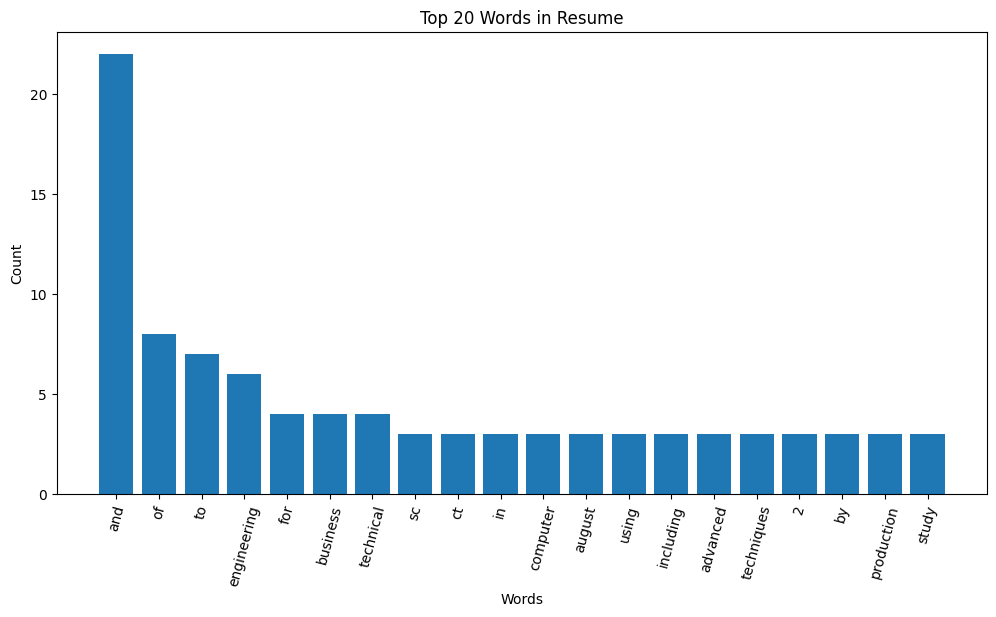

In [ ]:
plt.figure(figsize=(12,6))
plt.bar(top_20_words, top_20_counts)
plt.xticks(rotation=75)
plt.xlabel("Words")
plt.ylabel("Count")
plt.title("Top 20 Words in Resume")
plt.show()

## b. Removing stop words from resume

In [ ]:
# Open the file and read all lines
with open("/content/stop_word_list.csv", "r") as f:
    stop_words = f.read().splitlines()

In [ ]:
specific_words = [w for w in resume_words if w not in stop_words]

In [ ]:
specific_word_counts = Counter(specific_words)

top_20_specific_words = specific_word_counts.most_common(20)
words, counts = zip(*top_20_specific_words)

Histogram for top 20 specific_words

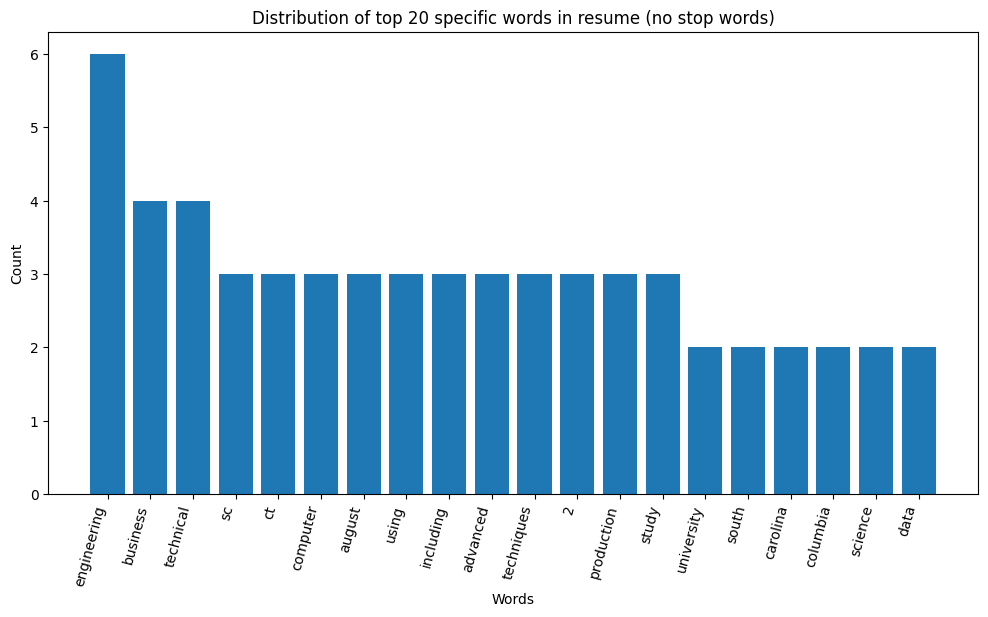

In [ ]:
plt.figure(figsize=(12,6))
plt.bar(words, counts)
plt.xticks(rotation=75, ha='right')
plt.xlabel("Words")
plt.ylabel("Count")
plt.title("Distribution of top 20 specific words in resume (no stop words)")
plt.show()

# c. Analysis

By removing the stop words, it is clear to see now my resume is heavily focused on my engineering, business and technical skills based on the occurances of these words in the histogram.

# Task 2

## 1. Read resumes as text and get list of all_resume_words

In [74]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [75]:
# Checking that StudentResumes directory is available
!ls "/content/drive/MyDrive/StudentResumes"

'Aashish Jayapuram Resume_Revised.pdf'	 resume1.pdf
 AidanVanVoorhis_2025_Resume.pdf	'Resume_ALim (2).pdf'
 Ardoine_Docteur_Resume.pdf		 ResumeEvanFunderburg.pdf
'Cody Miller - Resume.pdf'		 Resume-jacob-robertson.pdf
'Copy of Nathan Nicodin Resume.pdf'	 Resume_Patrick_Bailey.pdf
 David_Dinh_Resume_2026WOGPA.pdf	 Resume_Updated_ShrutiJ.pdf
'DJ Ravenell’s Resume.pdf'		'Rice Davis Resume.pdf'
 Dustin_McDowell_Resume.pdf		 SaraMuthuselvam-Resume.pdf
 Eli_Hatcher_resume.pdf			 Steven_Dindl-Resume_2025.pdf
'FINAL Resume- IT Intership.pdf'	 Tej_resume.pdf
'James Tabakian Resume 2025 (1).pdf'	'Trent Braley Resume 2025.pdf'
'Luke Peter Resume.pdf'			'TylerKorth Resume AI Class.pdf'
'Nathan Nicodin Resume.pdf'		'WThacher Resume 2025.pdf'
 Pedro_Fischetti_Resume.pdf


In [77]:
folder_path = "/content/drive/MyDrive/StudentResumes"  # path to my resumes folder
all_resume_words = []

for filename in os.listdir(folder_path):
    if filename.endswith(".pdf"):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, "rb") as f:
            reader = PyPDF2.PdfReader(f)
            text = ""
            for page in reader.pages:
                if page.extract_text():
                    text += page.extract_text()
            # Tokenize words
            words = re.findall(r'\b\w+\b', text.lower())
            all_resume_words.extend(words)  # combine into one big list


## 2. Histogram of top 20 resume words for all resumes

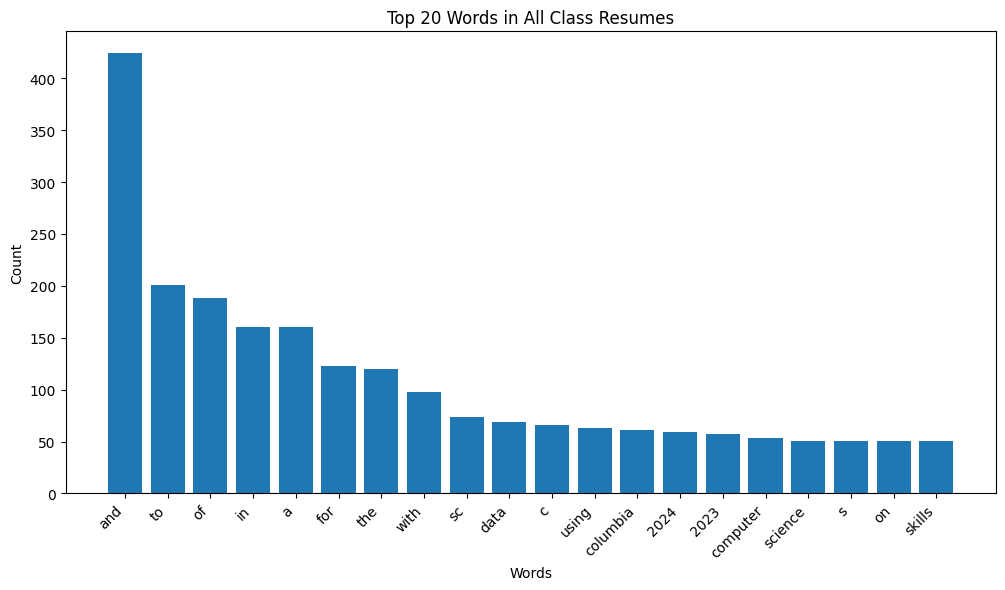

In [81]:
# Count words
word_counter = Counter(all_resume_words)
top_20 = word_counter.most_common(20)
words, counts = zip(*top_20)

# Plot top 20
plt.figure(figsize=(12,6))
plt.bar(words, counts)
plt.xticks(rotation=45, ha="right")
plt.xlabel("Words")
plt.ylabel("Count")
plt.title("Top 20 Words in All Class Resumes")
plt.show()

## 3. Removing stop words from all resumes

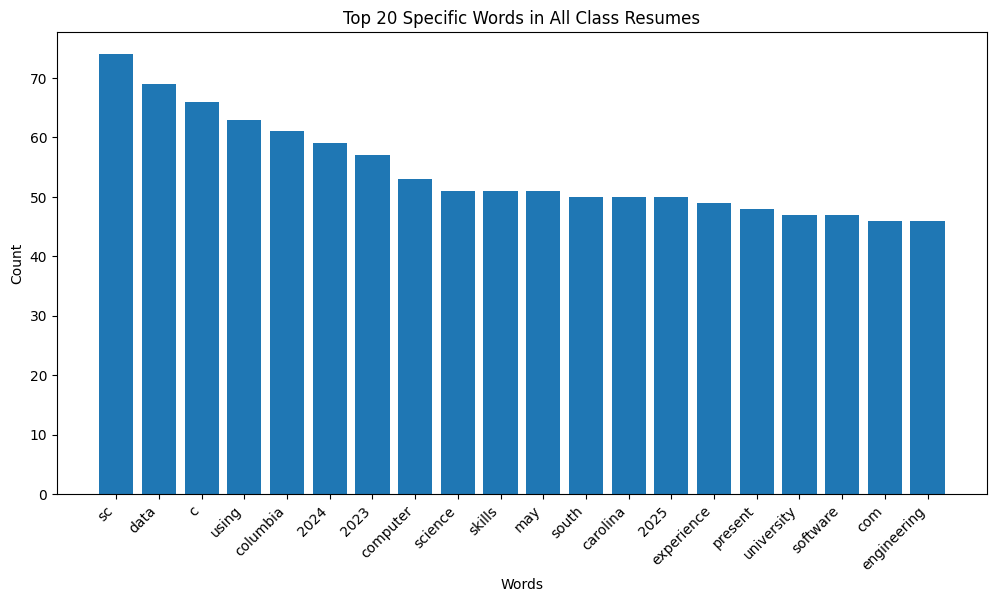

In [82]:
specific_words = [w for w in all_resume_words if w not in stop_words]

# Count and plot top 20 specific words
word_counter = Counter(specific_words)
top_20 = word_counter.most_common(20)
words, counts = zip(*top_20)

plt.figure(figsize=(12,6))
plt.bar(words, counts)
plt.xticks(rotation=45, ha="right")
plt.xlabel("Words")
plt.ylabel("Count")
plt.title("Top 20 Specific Words in All Class Resumes")
plt.show()


## 4. Analysis

Once again, by removing stop words from the resumes, some interesting observations can be made. The "word" "sc" is the most occuring "word," likely because everyone uses it to list locations for their work experience. The words "data," "c," "computer," and "science," likely indicate how the majority of students' are computer science students with passion for data analysis and programming.

# Task 3

My resume includes a few specific words like "Engineering," "Business," and "production" not included in those of my classmates. These words are unique to me as a student because of my experience in the business world from my internship, and my business minor. Most of my classsmates have more words associated with software and computer science because they are computer science majors, not computer engineering, and do not have business minors. This is interesting because it shows how other students are targeting more software heavy roles than I am in the job industry.